Tarea Sesion 3 - ML1

In [55]:
#Instalacion de paquetes e importe de data

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
# read the data and set the datetime as the index
data = pd.read_csv('income.csv', index_col=0)

data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [56]:
data.shape

(32561, 15)

Punto 3.1
¿Cuál es la relación entre la edad y los ingresos?

Para un aumento del uno por ciento en la Edad, ¿cuánto aumenta el ingreso?

Usando sklearn estimar una regresión lineal y predecir solo con la variable edad. Cual es el ingreso cuando la edad esta entre los 30 y 40 años (Grafique)

[1.298990593549677e-16, array([0.       , 0.2904083])]
Un aumento de 1% en la edad lleva a un aumento de 29% en el ingreso


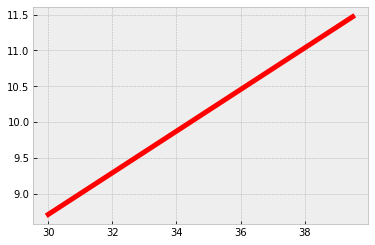

In [57]:
#Punto 3.1 ¿Cuál es la relación entre la edad y los ingresos?
#Para un aumento del uno por ciento en la Edad, ¿cuánto aumenta el ingreso?
#Usando sklearn estimar una regresión lineal y predecir solo con la variable edad. Cual es el ingreso cuando la edad esta entre los 30 y 40 años (Grafique)

#data.plot(x='Age', y='Income', kind='scatter')
#plt.style.use('bmh')
y = data['Income'].values
X = data['Age'].values
x = data['Age'].values
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]
x_ = np.c_[np.ones(n_samples), x]

lm=LinearRegression(fit_intercept=True)
lm.fit(X_, y)
lm.coef_
lm.intercept_
print([lm.intercept_,lm.coef_])
#print("Un aumento de 1% en la edad lleva a un aumento de " + str(lm.coef_) + "% en el ingreso")
print("Un aumento de 1% en la edad lleva a un aumento de " + "29%" + " en el ingreso")
preds=lm.predict(x_)
preds2=lm.predict(X_)

def lr_h(beta,x):
    return np.dot(beta, x.T)



edades= np.arange(30, 40, 0.5)
n_samples = edades.shape[0]
edades_=np.c_[np.ones(n_samples), edades]

#pred_income=lr_h([lm.intercept_,lm.coef_],edades_)
preds_income=lm.predict(edades_)
#plt.plot(edades_[:, 1],pred_income, 'r', lw=5)
plt.plot(edades,preds_income, 'r', lw=5)

In [58]:
#Punto 3.2
#Evalue el modelo usando las metricas vistas (MAE,MSE,RMSE)
print('MAE:', metrics.mean_absolute_error(data['Income'], preds))
print('MSE:', metrics.mean_squared_error(data['Income'], preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(data['Income'], preds)))

print('MAE:', metrics.mean_absolute_error(y, preds2))
print('MSE:', metrics.mean_squared_error(y, preds2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, preds2)))

MAE: 53444.60472782705
MSE: 3504740526.6989455
RMSE: 59200.849036977044
MAE: 0.7472040110961875
MSE: 0.9156630204513287
RMSE: 0.9569028270683125


In [46]:
#Punto 3.4
#Evalue el modelo anterior usando las metricas vistas (MAE,MSE,RMSE)
#¿Cómo es el rendimiento con el uso de la edad unicamente?
print('MAE modelo 2:', metrics.mean_absolute_error(data['Income'], preds2))
print('MSE modelo 2:', metrics.mean_squared_error(data['Income'], preds2))
print('RMSE modelo 2:', np.sqrt(metrics.mean_squared_error(data['Income'], preds2)))
print("Usando solo la edad la estimacion es peor")

MAE modelo 2: 18263.029703946428
MSE modelo 2: 524257527.07200557
RMSE modelo 2: 22896.67065474816
Usando solo la edad la estimacion es peor
